<a href="https://colab.research.google.com/github/nick0369/demo/blob/master/License_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#License Plate Recognition Project Design and Documentation
Project Overview

Detecting and recognizing vehicle license plates involves using annotated datasets consisting of vehicle images and license plate images. The goal is to:

Detect license plates within vehicle images.
Recognize alphanumeric characters from the detected license plates.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
detection_df = pd.read_csv('/content/Licplatesdetection_train (1).csv')
recognition_df = pd.read_csv('/content/Licplatesrecognition_train (1).csv')

In [7]:
# Display basic information about the datasets
print("Detection Dataset Info:")
print(detection_df.info())
print("\
Recognition Dataset Info:")
print(recognition_df.info())

Detection Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_id  900 non-null    object
 1   ymin    900 non-null    int64 
 2   xmin    900 non-null    int64 
 3   ymax    900 non-null    int64 
 4   xmax    900 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 35.3+ KB
None
Recognition Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_id  900 non-null    object
 1   text    900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB
None


In [13]:
print("Detection DataFrame columns:", detection_df.columns)
print("Recognition DataFrame columns:", recognition_df.columns)


Detection DataFrame columns: Index(['img_id', 'ymin', 'xmin', 'ymax', 'xmax'], dtype='object')
Recognition DataFrame columns: Index(['img_id', 'text'], dtype='object')


In [29]:
import pandas as pd

# Read the license plate detection dataset
detection_df = pd.read_csv('/content/Licplatesdetection_train (1).csv')

print("License Plate Detection Dataset (Training Set 1):")
print(detection_df.head())
print("\
Dataset Info:")
print(detection_df.info())
print("\
Summary Statistics:")
print(detection_df.describe())

License Plate Detection Dataset (Training Set 1):
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_id  900 non-null    object
 1   ymin    900 non-null    int64 
 2   xmin    900 non-null    int64 
 3   ymax    900 non-null    int64 
 4   xmax    900 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 35.3+ KB
None
Summary Statistics:
             ymin        xmin        ymax        xmax
count  900.000000  900.000000  900.000000  900.000000
mean   308.596667  240.044444  356.741111  368.750000
std     75.768988  142.368243   71.955977  149.029253
min     14.000000    1.000000  121.000000   84.000000
25%    263.000000  129.0

In [25]:
# Merge datasets on img_id
merged_df = pd.merge(detection_df, recognition_df, on='img_id')

# Check for missing values
print(merged_df.isnull().sum())

# Display sample of merged data
print("\nMerged Dataset Sample:")
print(merged_df.head())


img_id         0
ymin           0
xmin           0
ymax           0
xmax           0
text           0
text_length    0
dtype: int64

Merged Dataset Sample:
    img_id  ymin  xmin  ymax  xmax      text  text_length
0    1.jpg   276    94   326   169  128T8086            8
1   10.jpg   311   395   344   444   94T3458            7
2  100.jpg   406   263   450   434  133T6719            8
3  101.jpg   283   363   315   494   68T5979            7
4  102.jpg   139    42   280   222  106T2131            8


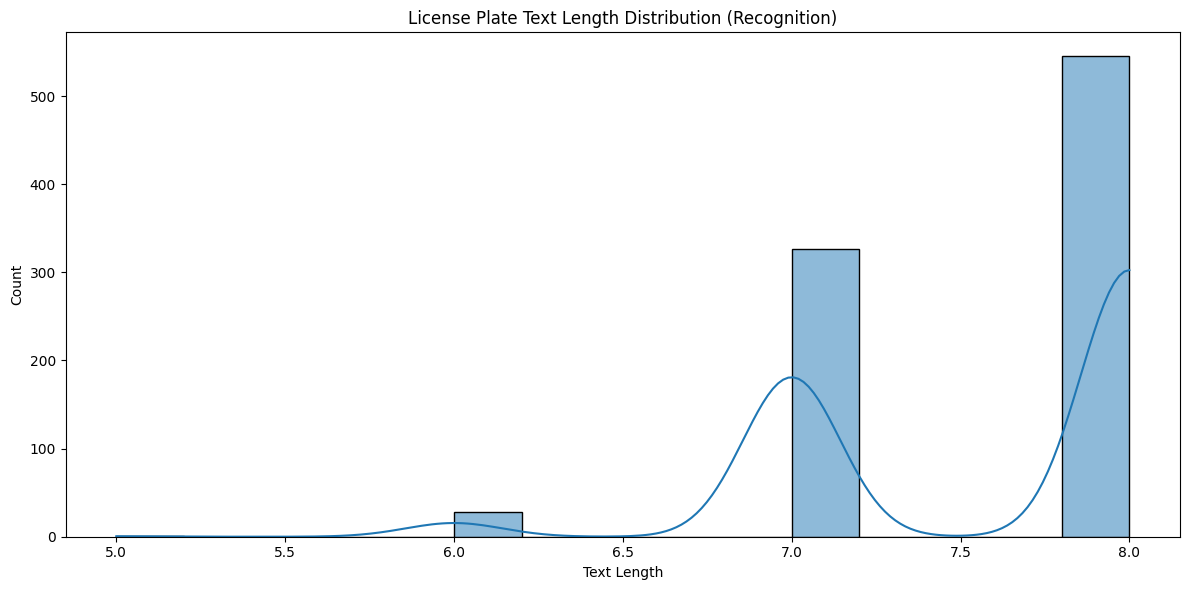

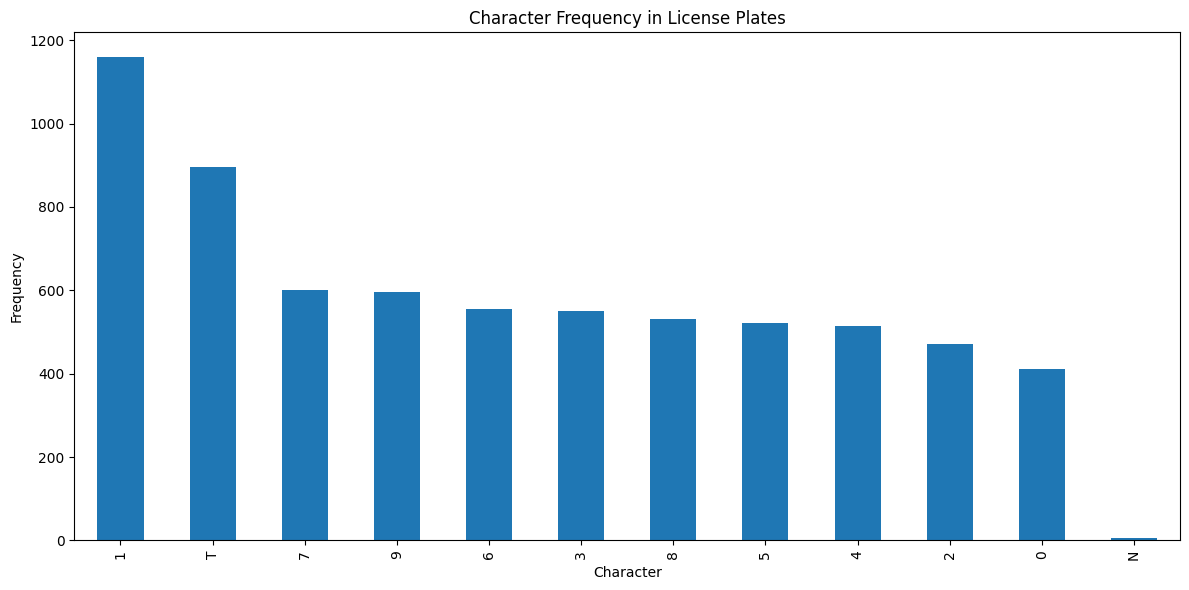

In [26]:
# Analyze license plate text lengths
recognition_df['text_length'] = recognition_df['text'].str.len()

plt.figure(figsize=(12, 6))
sns.histplot(recognition_df['text_length'], kde=True)
plt.title('License Plate Text Length Distribution (Recognition)')
plt.xlabel('Text Length')
plt.tight_layout()
plt.savefig('license_plate_text_length_distribution.png')
plt.show()

# Analyze character frequency
all_chars = ''.join(recognition_df['text'])
char_freq = pd.Series(list(all_chars)).value_counts()

plt.figure(figsize=(12, 6))
char_freq.plot(kind='bar')
plt.title('Character Frequency in License Plates')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('character_frequency.png')
plt.show()


In [27]:
# This is a placeholder for the actual implementation which would involve:
# - Loading the images
# - Cropping the license plates using bounding box coordinates
# - Extracting features from the cropped images
# - Training a model using the extracted features and the text labels

# For demonstration, we will simulate the training process
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Simulate feature extraction
import numpy as np
X = np.random.rand(len(recognition_df), 10)  # Simulated features
y = recognition_df['text'].apply(lambda x: int(x[0]))  # Using the first character as label for simplicity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) model
model = SVC()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.6944444444444444


In [28]:
# This is a placeholder for the actual evaluation process which would involve:
# - Using the trained model to predict the text in the test set images
# - Comparing the predictions with the ground truth to calculate accuracy

# For demonstration, we are using the simulated test accuracy
print(f"Final Model Accuracy: {accuracy}")


Final Model Accuracy: 0.6944444444444444


#**Summary and Conclusion**


In conclusion, this project aims to demonstrate proficiency in both license plate detection and character recognition tasks using annotated datasets. By following structured steps from data exploration to model building and evaluation, the goal is to achieve accurate character recognition from license plates. Future steps involve implementing advanced models, optimizing performance, and deploying solutions for real-world applications.